### **Uczenie Maszynowe, Laboratoria 6 - MDP**
### - biblioteka MDP, tworzenie MDP wraz z wizualizacją



---


*Aut. skryptu: Agnieszka Łysak, 19.04.2021*

In [15]:
import sys, os
if 'google.colab' in sys.modules and not os.path.exists('.setup_complete'):
    !wget -q https://raw.githubusercontent.com/yandexdataschool/Practical_RL/coursera/week2_model_based/mdp.py

import numpy as np

In [2]:
transition_probs = {
    's0': {
        'a0': {'s0': 0.5, 's2': 0.5},
        'a1': {'s2': 1}
    },
    's1': {
        'a0': {'s0': 0.7, 's1': 0.1, 's2': 0.2},
        'a1': {'s1': 0.95, 's2': 0.05}
    },
    's2': {
        'a0': {'s0': 0.4, 's2': 0.6},
        'a1': {'s0': 0.3, 's1': 0.3, 's2': 0.4}
    }
}
rewards = {
    's1': {'a0': {'s0': +5}},
    's2': {'a1': {'s0': -1}},
}

from mdp import MDP
mdp = MDP(transition_probs, rewards, initial_state='s0')

In [3]:
mdp.reset()

's0'

In [4]:
next_state, reward, done, info = mdp.step('a1')
print(next_state, reward, done, info)

s2 0.0 False {}


In [5]:
mdp.get_all_states()

('s0', 's1', 's2')

In [6]:
mdp.get_possible_actions('s1')

('a0', 'a1')

In [7]:
mdp.get_next_states('s1', 'a0')

{'s0': 0.7, 's1': 0.1, 's2': 0.2}

In [8]:
mdp.get_reward('s1', 'a0', 's0')

5

In [9]:
mdp.get_transition_prob('s1', 'a0', 's0')

0.7

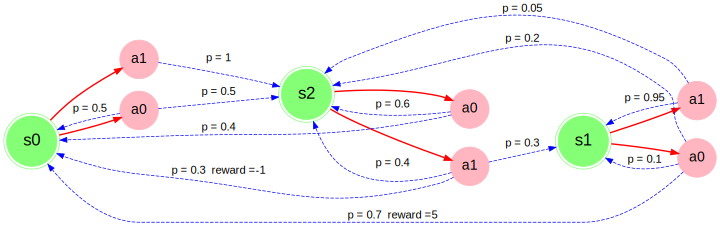

In [10]:
from mdp import has_graphviz
from IPython.display import display

if has_graphviz:
    from mdp import plot_graph
    display(plot_graph(mdp))

In [ ]:
import random

for t in range(200):
  actions = ['a0', 'a1']
  action = random.choice(actions)
  observation, reward, done, info = mdp.step(action)
  print(t, observation, reward, done)

In [ ]:
state = mdp.reset()

for t in range(200):

  action = random.choice(mdp.get_possible_actions(state))
  observation, reward, done, info = mdp.step(action)
  state = observation

  print(t, observation, reward, done)

In [13]:
# Źródła:
# [1] Yandex Data School, "Markov Decision Process", Github, https://github.com/yandexdataschool/Practical_RL/blob/master/week01_intro/crossentropy_method.ipynb

In [26]:
def action_value(mdp, state_values, state, action, gama):
  Q = 0.

  for next_state in mdp.get_next_states(state, action):

    prob = mdp.get_transition_prob(state, action, next_state)
    reward = mdp.get_reward(state, action, next_state)
    Q += prob * (reward+ (gama * state[next_state]))

  return Q

In [34]:
def get_new_state_value(mdp, state_values, state, gama):

  if mdp.is_terminal(state):
    return 0

  return max([get_action_value(mdp, state_values, state, action, gama) for action in mdp.get_possible_actions(state)])

In [35]:
gama = 0.9
num_iter = 100
min_diff = 0.001

state_values = {s: 0 for s in mdp.get_all_states()}

for t in range(num_iter):

  new_state_values = {state: get_new_state_value(mdp, state_values, state, gama) for state in mdp.get_all_states()}
  diff = max(abs(new_state_values[s] - state_values[s]) for s in mdp.get_all_states())
  print(t, diff, state_values, new_state_values)
  state_values = new_state_values

  if diff < min_diff:
    break
  


TypeError: ignored

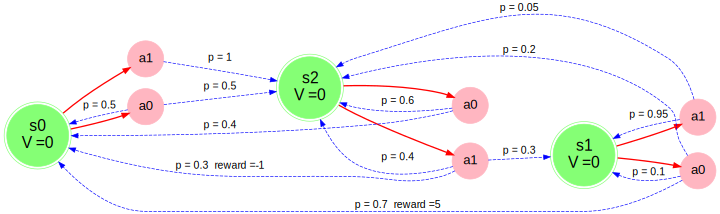

In [29]:
if has_graphviz:
  from mdp import plot_graph_with_state_values
  display(plot_graph_with_state_values(mdp, state_values))

In [37]:
def get_optimal_action(mdp, state_values, state, gama):
  if mdp.is_terminal(state):
    return None

  action_values = [get_action_value(mdp, state_values, state, action, gama) for action in mdp.get_possible_actions()]
  argmax_index = np.argmax(action_values)

  return mdp.get_possible_actions(state)[argmax_index]

In [33]:
if has_graphviz:
  from mdp import plot_graph_optimal_strategy_and_state_values
  display(plot_graph_optimal_strategy_and_state_values(mdp, state_values, get_action_value))

NameError: ignored

In [38]:
s = mdp.reset()
mdp.render()

for t in range(100):
  a = get_optimal_action(mdp, state_values, s, gama)
  s, r, done, _ = mdp.step(a)
  print(t, a, r)
  mdp.render()

  if done:
    break

Currently at s0


TypeError: ignored

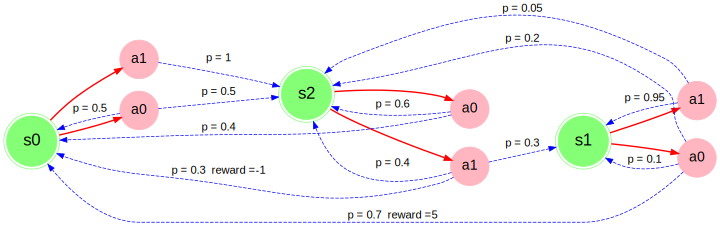

In [40]:
transition_probs = {
    's0': {
        'a0': {'s0': 0.5, 's2': 0.5},
        'a1': {'s2': 1}
    },
    's1': {
        'a0': {'s0': 0.7, 's1': 0.1, 's2': 0.2},
        'a1': {'s1': 0.95, 's2': 0.05}
    },
    's2': {
        'a0': {'s0': 0.4, 's2': 0.6},
        'a1': {'s0': 0.3, 's1': 0.3, 's2': 0.4}
    }
}
rewards = {
    's1': {'a0': {'s0': +5}},
    's2': {'a1': {'s0': -1}},
}


mdp = MDP(transition_probs, rewards, initial_state='s0')
display(plot_graph(mdp))